In [1]:
import scipy
from scipy import misc
import glob
from PIL import Image
import matplotlib.pyplot as plt

from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D)
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pydub import AudioSegment
import shutil
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

Using TensorFlow backend.
/home/student/.local/lib/python3.6/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


/home/student/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


Divertimento for viola and piano II Minuet_PROCESSED.wav


/home/student/.local/lib/python3.6/site-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


Notturno for Viola op 42 IV Adagio - Scherzo Allegro molto - Adagio_PROCESSED.wav
Divertimento for viola and piano I Adagio_PROCESSED.wav
Notturno for Viola, op 42 II Adagio_PROCESSED.wav
Divertimento for viola and piano III Allegro di molto_PROCESSED.wav
Notturno for Viola, op 42 III Menuetto_PROCESSED.wav
Notturno for Viola op 42 III Menuetto Allegretto_PROCESSED.wav
Notturno for Viola op 42 I Marcia Allegro_PROCESSED.wav
Notturno for Viola op 42 II Adagio_PROCESSED.wav
Notturno for Viola, op 42 VII Marcia Allegro_PROCESSED.wav
Notturno for Viola, op 42 V Andante_PROCESSED.wav
Notturno for Viola op 42 VI Andante quasi Allegretto Allegro_PROCESSED.wav
Notturno for Viola, op 42 VI Andante_PROCESSED.wav
Notturno for Viola, op 42 IV Adagio_PROCESSED.wav
Violin Sonata No 1 in D Op 12 No 1 III Rondo Allegro_PROCESSED.wav
Violin Sonata in G Minor, D 408 I Allegro giusto_PROCESSED.wav
Violin Sonata in A Minor, D 385 I Allegro moderato_PROCESSED.wav
Violin Sonata No 2 in A Op 12 No 2 II Andan

/home/student/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Violin Sonata in D major, D 384 II Andante_PROCESSED.wav
Violin Sonata in A Major, D 574 II Scherzo Presto_PROCESSED.wav
Violin Sonata No 1 in D Op 12 No 1 I Allegro con brio_PROCESSED.wav
Violin Sonata in A Major, D 574 IV Allegro vivace_PROCESSED.wav
Violin Sonata in D major, D 384 I Allegro molto_PROCESSED.wav
Violin Sonata in A Major, D 574 I Allegro moderato_PROCESSED.wav
Violin Sonata No 1 in D Op 12 No 1 II Tema con variazioni_PROCESSED.wav
Violin Sonata in A Major, D 574 III Andantino_PROCESSED.wav


<Figure size 432x288 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

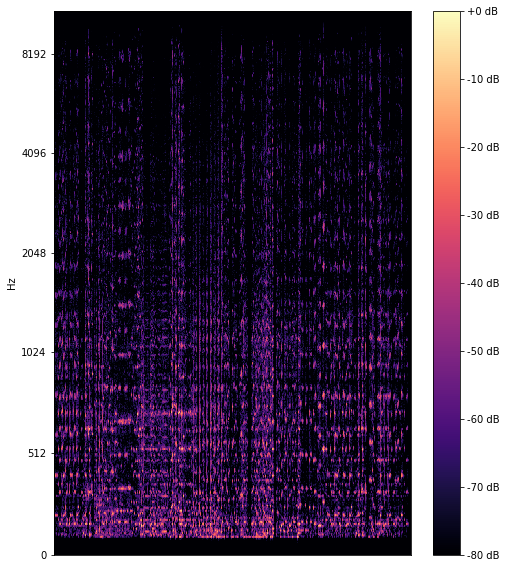

In [2]:
import os
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import numpy as np
import math
os.chdir('/home/student/Downloads/new_violin_viola/classical/viola/combined_train')
x1=[]
y_train=[]
mfcc_list_mean = []
mfcc_list_std = []

freqViolin = []
freqViola = []
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/classical/viola/combined_train'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        #temp = x/x.max()  #normalization
        #S = librosa.feature.melspectrogram(temp, sr=sr, n_mels=128)  # 128 mel bands
        #mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=13)
        #tempList = list(np.mean(mfcc,1))
        #tempList1 = list(np.std(mfcc,1))
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/classical/train_combined/viola/{f_name[:-4]}.png')
        
        
os.chdir('/home/student/Downloads/new_violin_viola/classical/violin/combined_train')  
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/classical/violin/combined_train'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/classical/train_combined/violin/{f_name[:-4]}.png')



Violin Sonata No 21 in E minor K 304 I Allegro_PROCESSED.wav
Notturno for Viola, op 42 I_PROCESSED.wav
Beethoven Sonata for viola and piano in A Major opus 69, 1st movement_PROCESSED.wav
Mozart Violin Sonata in E minor K II Tempo_PROCESSED.wav
Andante _ Allegretto in C major KV 404(Mozart)_PROCESSED.wav
Mozart Violin Sonata in E minor K I Allegro_PROCESSED.wav
Divertimento_K334Menuet_PROCESSED.wav
Mozart - Sonata for Piano and Violin in G Major, K 301 - I_PROCESSED.wav
Brahms - Lullaby for Violin and Piano duet_PROCESSED.wav
Beethoven-Sonata for Piano and Violin no 5, Spring Sonata I_PROCESSED.wav
Fantasie in C Major, D_PROCESSED.wav
Violin Sonata No 2 in A Op 12 No 2 I Allegro vivace_PROCESSED.wav


<Figure size 432x288 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

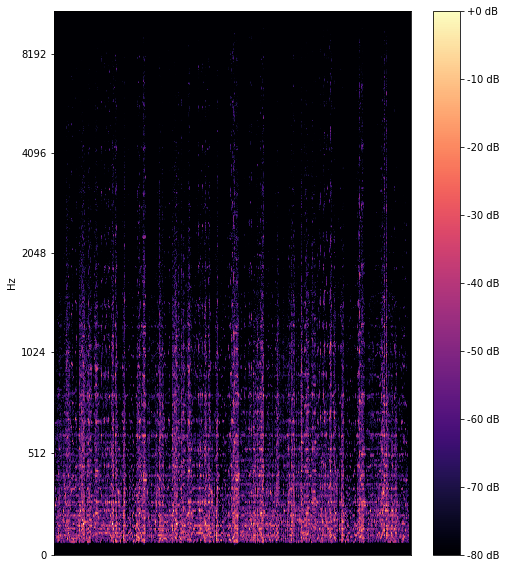

In [3]:
os.chdir('/home/student/Downloads/new_violin_viola/classical/viola/combined_test')
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/classical/viola/combined_test'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        #temp = x/x.max()  #normalization
        #S = librosa.feature.melspectrogram(temp, sr=sr, n_mels=128)  # 128 mel bands
        #mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=13)
        #tempList = list(np.mean(mfcc,1))
        #tempList1 = list(np.std(mfcc,1))
       
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/classical/test_combined/viola/{f_name[:-4]}.png')
        
        
os.chdir('/home/student/Downloads/new_violin_viola/classical/violin/combined_test')  
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/classical/violin/combined_test'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/classical/test_combined/violin/{f_name[:-4]}.png')


    

In [2]:
train_dir = "/home/student/Downloads/new_violin_viola_dl/classical/train_combined/"
train_data = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator =train_data.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=2,subset='training')


validation_generator=train_data.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=2,subset='validation')

testing_dir = "/home/student/Downloads/new_violin_viola_dl/classical/test_combined/"
testing_data = ImageDataGenerator(rescale=1./255)
testing_generator = testing_data.flow_from_directory(testing_dir,target_size=(288,432),color_mode='rgba',class_mode='categorical',batch_size=2)


Found 24 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [3]:
def GenreModel(input_shape = (288,432,4),classes=2):
  
  X_input = Input(input_shape)

  X = Conv2D(8,kernel_size=(3,3),strides=(1,1))(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(16,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(32,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(128,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  
  X = Flatten()(X)
  
  

  X = Dense(classes, activation='softmax', name='fc' + str(classes))(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model

In [6]:
import keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

  
model = GenreModel(input_shape=(288,432,4),classes=2)
opt = Adam(learning_rate=0.0015)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy', 'mae']) 

history = model.fit_generator(train_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30
12/12 [==============================] - 1s 96ms/step - loss: 9.4103 - accuracy: 0.5000 - mae: 0.4979 - val_loss: 0.7041 - val_accuracy: 0.7500 - val_mae: 0.4929
Epoch 2/30
12/12 [==============================] - 0s 21ms/step - loss: 2.9743 - accuracy: 0.4583 - mae: 0.5401 - val_loss: 0.7137 - val_accuracy: 0.5000 - val_mae: 0.4938
Epoch 3/30
12/12 [==============================] - 0s 23ms/step - loss: 1.8050 - accuracy: 0.5833 - mae: 0.4316 - val_loss: 0.8115 - val_accuracy: 0.5000 - val_mae: 0.4913
Epoch 4/30
12/12 [==============================] - 0s 24ms/step - loss: 3.0680 - accuracy: 0.5833 - mae: 0.3997 - val_loss: 0.2910 - val_accuracy: 0.5000 - val_mae: 0.4870
Epoch 5/30
12/12 [==============================] - 0s 23ms/step - loss: 2.4765 - accuracy: 0.6250 - mae: 0.4005 - val_loss: 1.8374 - val_accuracy: 0.5000 - val_mae: 0.4987
Epoch 6/30
12/12 [==============================] - 0s 23ms/step - loss: 0.8200 - accuracy: 0.7500 - mae: 0.2491 - val_loss: 2.7326 - v

In [7]:
model.evaluate(testing_generator)

6/6 [==============================] - 0s 28ms/step


[0.19315114617347717, 0.5833333134651184, 0.36093568801879883]